In [145]:
from data_lib.data_lib import *

In [146]:
gests = read_data('data2.csv')

In [147]:
gests_noise = get_noise(gests, 0.5, None)

In [148]:
X, y = array_from_dict(gests, ndots=20, gyro=False)

In [149]:
X_noise, y = array_from_dict(gests_noise, ndots=20, gyro=False)

In [150]:
X = np.array([x[0] for x in X])
X_noise = np.array([x[0] for x in X_noise])

for ind in xrange(len(X_noise)):
    x = X_noise[ind][:,0]
    X_noise[ind][:,0] = (x-min(x))/(max(x)-min(x))
    y = X_noise[ind][:,1]
    X_noise[ind][:,1] = (y-min(y))/(max(y)-min(y))
    z = X_noise[ind][:,2]
    X_noise[ind][:,2] = (z-min(z))/(max(z)-min(z))

for ind in xrange(len(X)):
    x = X[ind][:,0]
    X[ind][:,0] = (x-min(x))/(max(x)-min(x))
    y = X[ind][:,1]
    X[ind][:,1] = (y-min(y))/(max(y)-min(y))
    z = X[ind][:,2]
    X[ind][:,2] = (z-min(z))/(max(z)-min(z))

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
from keras.layers import Input, LSTM, Dropout, Dense, RepeatVector
from keras.layers.merge import Add, Concatenate
from keras.models import Model

timesteps, input_dim, latent_dim = 20, 3, 1

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim, return_sequences=True, activation='sigmoid')(inputs)
#encoded = Concatenate(axis=-1)([inputs,encoded])
encoded = Dropout(0.1)(encoded)
#encoded = Dense(10)(encoded)
#encoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True, activation='sigmoid')(encoded)
sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [163]:
sequence_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [164]:
sequence_autoencoder.fit(X_noise, X, epochs=300,batch_size=10,shuffle=True, validation_split=0.1, verbose=0)

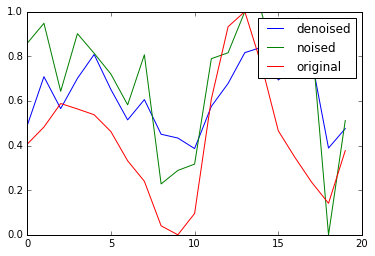

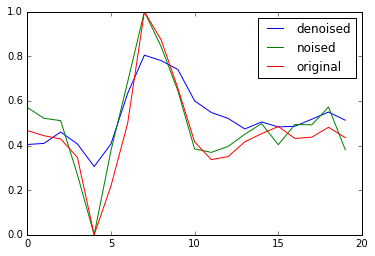

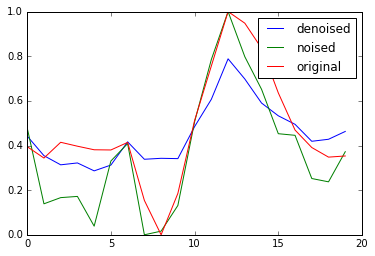

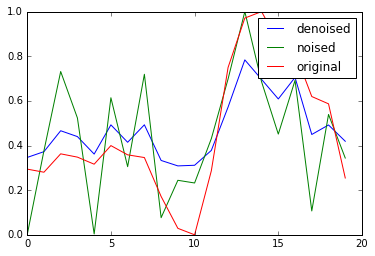

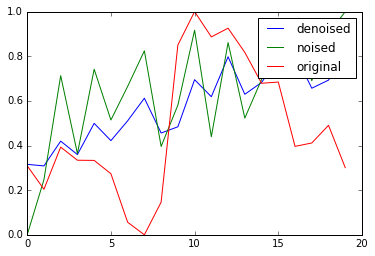

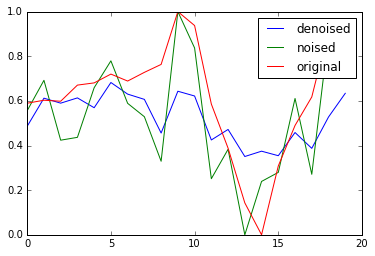

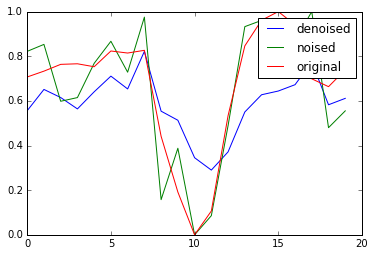

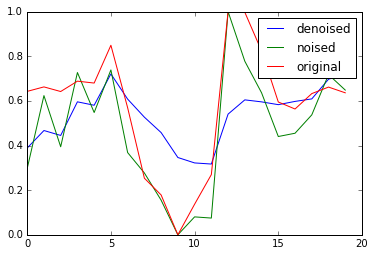

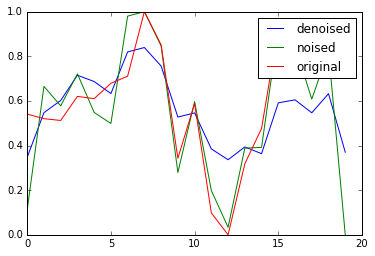

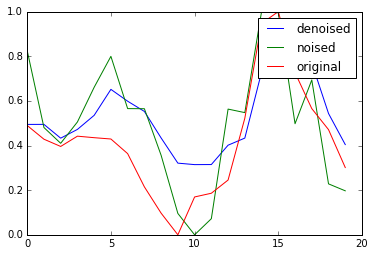

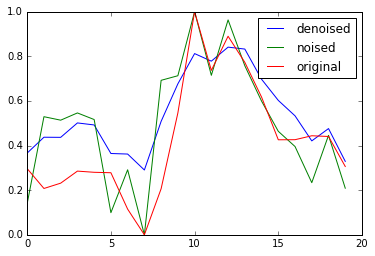

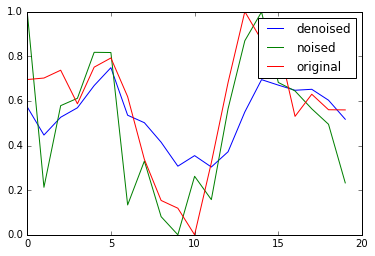

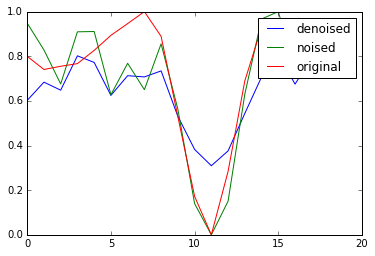

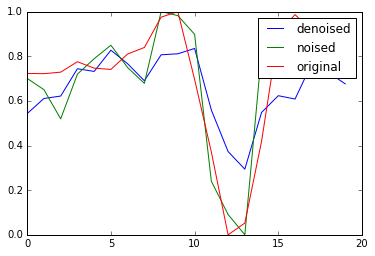

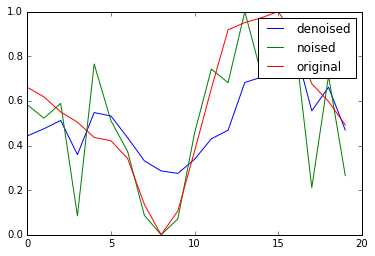

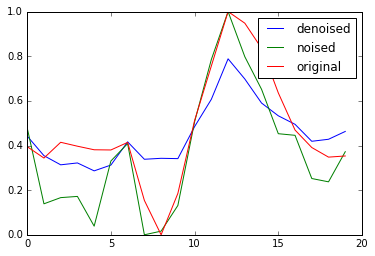

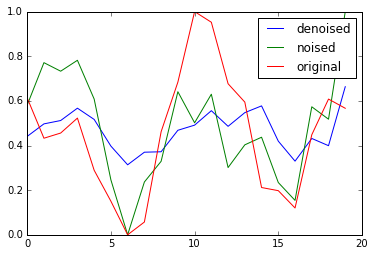

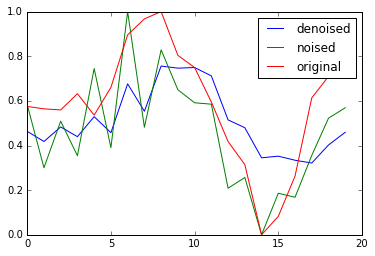

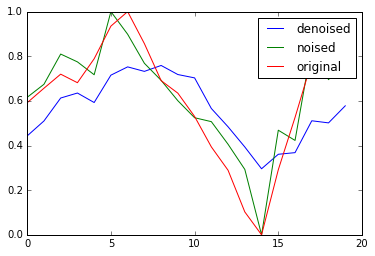

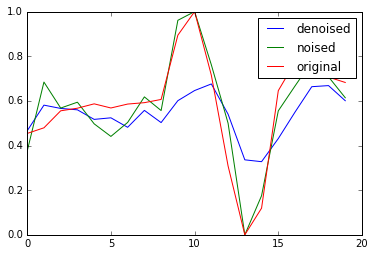

In [166]:
for _ in range(20):
    k = int(len(X)*np.random.random_sample())
    plt.plot([p[0] for p in sequence_autoencoder.predict(X_noise)[k]])
    plt.plot([p[0] for p in X_noise[k]])
    plt.plot([p[0] for p in X[k]])
    plt.legend(['denoised', 'noised', 'original'])
    plt.show()

In [168]:
print(sequence_autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 20, 3)             0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 20, 1)             20        
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 1)             0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 20, 3)             60        
Total params: 80.0
Trainable params: 80.0
Non-trainable params: 0.0
_________________________________________________________________
None
